In [1]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def geometric_pmf(p, i):
    return (1 - p)**i * p

In [3]:
def rice(x, k):
    return k + (x // 2**k)
def optimal_rice(x, p):
    k = numpy.maximum(numpy.floor(numpy.log2(1/p)) - 0, 0)
    return rice(x, k)

In [4]:
def biased_gamma(x, k):
    l = numpy.floor(numpy.log2(x))
    return 1 + numpy.maximum(l - k, 0) + numpy.maximum(l, k)

In [5]:
bits = {
    "optimal rice": optimal_rice,
    "gamma": lambda x, p: 1 + 2 * numpy.floor(numpy.log2(x)),
    "delta": lambda x, p: 1 + numpy.floor(numpy.log2(x)) + 2 * numpy.floor(numpy.log2(numpy.floor(numpy.log2(x)) + 1)),
    "vlq4": lambda x, p: 4 * (numpy.floor(numpy.log2(x) / 3) + 1),
    #"vlq": lambda x, p:8  * (numpy.floor(numpy.log2(x) / 7) + 1),
    "biased_gamma3": lambda x, p: biased_gamma(x, 3),
}

In [6]:
def total_bits(encoding, p):
    xs = numpy.arange(1, 10000)
    p, xs = numpy.meshgrid(p, xs)
    
    #a = geometric_pmf(p, xs) * encoding(xs)
    probabilities = geometric_pmf(p, xs)
    bit_lengths = encoding(xs, p)
        
    expected_bits = numpy.sum(probabilities * bit_lengths, axis=0) / numpy.sum(probabilities, axis=0)
    
    return expected_bits

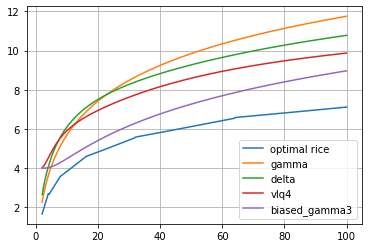

In [7]:
ps = 1 / numpy.linspace(2, 100, 500)

for name, encoding in bits.items():
    values = total_bits(encoding, ps)
    plt.plot(1/ps, values, label=name)
    
plt.legend()
plt.grid()
plt.show()

In [8]:
def relative_bits(encoding, p):
    xs = numpy.arange(1, 10000)
    p, xs = numpy.meshgrid(p, xs)
    
    #a = geometric_pmf(p, xs) * encoding(xs)
    probabilities = geometric_pmf(p, xs)
    encoded_bit_lengths = encoding(xs, p)
    optimal_bit_lengths = numpy.floor(numpy.log2(xs)) + 1
        
    relative_bits = numpy.sum(probabilities * encoded_bit_lengths / optimal_bit_lengths, axis=0) / numpy.sum(probabilities, axis=0)
    
    return relative_bits

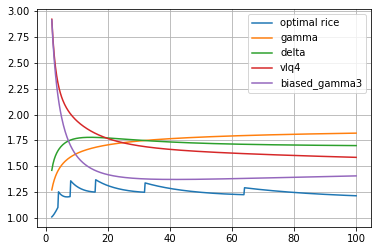

In [9]:
ps = 1 / numpy.linspace(2, 100, 500)

for name, encoding in bits.items():
    values = relative_bits(encoding, ps)
    plt.plot(1/ps, values, label=name)
    
plt.legend()
plt.grid()
plt.show()